<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
# https://github.com/callum-ryan/vincentyPy/blob/master/vincenty.py
    
    
import numpy as np
from math import radians
import sys

x1 = 155000
y1 = 463000 
x2 = 257415
y2 = 471042

x1, y1, x2, y2 = map(radians, [x1, y1, x2, y2])

# c1 = c1.split(',')
# c2 = c2.split(',')

# c1 = sys.argv[1].split(',')
# c2 = sys.argv[2].split(',')

def to_rad(lat_long):
	for x, y in enumerate(lat_long):
		lat_long[x] = (np.float64(y) * np.pi) / 180
	return lat_long

# c1 = to_rad(c1)
# c2 = to_rad(c2)

a = 6378.137
f = 1/298.257223563
b = 6356.7523142

L = y1 - y2
u1 = np.arctan((1-f)*np.tan(x1))
u2 = np.arctan((1-f)*np.tan(x2))

lmd = L
lmdd = 0
count = 0

while abs(lmd-lmdd) > 1e-12 and count <= 100:
	sinSqsig = (np.cos(u2)*np.sin(lmd))*(np.cos(u2)*np.sin(lmd)) + (np.cos(u1)*np.sin(u2) - np.sin(u1)*np.cos(u2)*np.cos(lmd))*(np.cos(u1)*np.sin(u2) - np.sin(u1)*np.cos(u2)*np.cos(lmd))
	sinsig = np.sqrt(sinSqsig)
	cossig = np.sin(u1)*np.sin(u2) + np.cos(u1)*np.cos(u2)*np.cos(lmd)
	sig = np.arctan2(sinsig,cossig)
	sina = np.cos(u1)*np.cos(u2)*np.sin(lmd) / sinsig
	cosSqa = 1 - sina * sina
	cos2sigM = cossig - 2*np.sin(u1)*np.sin(u2)/cosSqa
	C = f/16*cosSqa*(4+f*(4-3*cosSqa))
	lmdd = lmd
	lmd = L + (1-C) * f * sina * (sig + C*sinsig*(cos2sigM+C*cossig*(-1+2*cos2sigM*cos2sigM)))
	count += 1

uSq = cosSqa * (a*a - b*b) / (b*b)
A = 1 + uSq/16384. * (4096 + uSq * (-768 + uSq * (320 - 175 * uSq)))
B = uSq / 1024. * (256 + uSq * (-128 + uSq * (74 - 47 * uSq)))
dsig = B * sinsig * (cos2sigM + B/4. * (cossig * (-1 + 2 * cos2sigM*cos2sigM) - B / 6. * cos2sigM * (-3 + 4 * sinsig * sinsig) * (-3 + 4 * cos2sigM * cos2sigM)))

s = b * A * (sig-dsig)
a1 = np.arctan2(np.cos(u2)*np.sin(lmd), np.cos(u1)*np.sin(u2)-np.sin(u1)*np.cos(u2)*np.cos(lmd))
a2 = np.arctan2(np.cos(u1)*np.sin(lmd), -np.sin(u1)*np.cos(u2)+np.cos(u1)*np.sin(u2)*np.cos(lmd))

print('distance        : '+'{0:.2f}'.format(s)+' km')
print('initial bearing : '+'{0:.2f}'.format(np.degrees(a1))+' °')
print('final bearing   : '+'{0:.2f}'.format(np.degrees(a2))+' °')

distance        : 12593.53 km
initial bearing : -62.85 °
final bearing   : -120.02 °


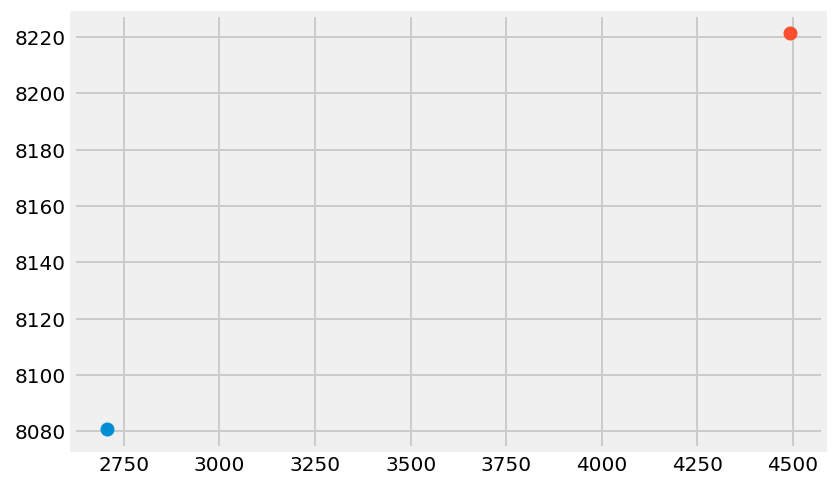

In [19]:
plt.plot(x1,y1, x2, y2, marker= 'o')#, y1, x2, y2, lw=5);

In [20]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

# Usage
lon1 = -103.548851
lat1 = 32.0004311
lon2 = -103.6041946
lat2 = 33.374939

print(haversine(x1, y1, x2, y2))

9714.289056865364


In [24]:
#coding:UTF-8
from math import radians, cos, sin, asin, sqrt, atan2, degrees

def haversine(pointA, pointB):

    if (type(pointA) != tuple) or (type(pointB) != tuple):
        raise TypeError("Only tuples are supported as arguments")

    lat1 = pointA[0]
    lon1 = pointA[1]

    lat2 = pointB[0]
    lon2 = pointB[1]

    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2]) 

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r


def initial_bearing(pointA, pointB):

    if (type(pointA) != tuple) or (type(pointB) != tuple):
        raise TypeError("Only tuples are supported as arguments")

    lat1 = radians(pointA[0])
    lat2 = radians(pointB[0])

    diffLong = radians(pointB[1] - pointA[1])

    x = sin(diffLong) * cos(lat2)
    y = cos(lat1) * sin(lat2) - (sin(lat1)
            * cos(lat2) * cos(diffLong))

    initial_bearing = atan2(x, y)

    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    initial_bearing = degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

pA = (155.000,46.449)
pB = (257.415,47.042)

x1 = 155000
y1 = 463000 
x2 = 257415
y2 = 471042
print(haversine(pA, pB))

print(initial_bearing(pA, pB))

11388.097408162095
359.8677007728352
